In [90]:
using Symbolics
using ModelingToolkit
using DifferentialEquations
using Plots
using Latexify

# Define symbolic variables and functions
@variables t
@variables m₁ m₂ l₁ l₂ g

# Define theta1 and theta2 as functions of time
@variables θ₁(t) θ₂(t)

# Define time derivatives
Dt = Differential(t)
θ₁ₜ = Dt(θ₁)
θ₂ₜ = Dt(θ₂)
θ₁ₜₜ = Dt(Dt(θ₁))
θ₂ₜₜ = Dt(Dt(θ₂))

Differential(t, 2)(θ₂(t))

## Double Pendulum - Symbolic Solution in Julia

Using Symbolics.jl to derive equations of motion via Lagrangian mechanics

### Step 1: Define Cartesian Coordinates

Convert polar coordinates (θ₁, θ₂) to Cartesian (x, y)

In [91]:
# Cartesian coordinates
x₁ = l₁ * sin(θ₁)
y₁ = -l₁ * cos(θ₁)

x₂ = x₁ + l₂ * sin(θ₂)
y₂ = y₁ - l₂ * cos(θ₂)

println("x₁ = ", x₁)
println("x₂ = ", x₂)

x₁ = l₁*sin(θ₁(t))
x₂ = l₁*sin(θ₁(t)) + l₂*sin(θ₂(t))


### Step 2: Define Kinetic and Potential Energy

In [92]:
# Velocities
ẋ₁ = Dt(x₁)
ẏ₁ = Dt(y₁)
ẋ₂ = Dt(x₂)
ẏ₂ = Dt(y₂)

# Kinetic energy
K₁ = (1/2) * m₁ * (ẋ₁^2 + ẏ₁^2)
K₂ = (1/2) * m₂ * (ẋ₂^2 + ẏ₂^2)
K = K₁ + K₂

# Potential energy (taking reference at pivot point)
V₁ = m₁ * g * y₁
V₂ = m₂ * g * y₂
V = V₁ + V₂

# Lagrangian
ℒ = K - V

println("Kinetic Energy computed")
println("Potential Energy computed")

Kinetic Energy computed
Potential Energy computed


### Step 3: Derive Euler-Lagrange Equations

For each generalized coordinate q, the Euler-Lagrange equation is:
$$\frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{q}}\right) - \frac{\partial \mathcal{L}}{\partial q} = 0$$

In [93]:
# Euler-Lagrange equations
EL₁ = Dt(Differential(θ₁ₜ)(ℒ)) - Differential(θ₁)(ℒ)
EL₂ = Dt(Differential(θ₂ₜ)(ℒ)) - Differential(θ₂)(ℒ)

println("Euler-Lagrange equation 1 derived")
println("Euler-Lagrange equation 2 derived")

Euler-Lagrange equation 1 derived
Euler-Lagrange equation 2 derived


### Step 4: Simplify and Solve for Accelerations

Simplify the equations and solve for θ₁̈ and θ₂̈

In [94]:
# Simplify the Euler-Lagrange equations
EL₁_simplified = simplify(expand_derivatives(EL₁))
EL₂_simplified = simplify(expand_derivatives(EL₂))

println("Simplified EL₁")
println("Simplified EL₂")

# Solve linear system for accelerations (version-safe)
eqs = [EL₁_simplified ~ 0, EL₂_simplified ~ 0]
sol = Symbolics.symbolic_linear_solve(eqs, [θ₁ₜₜ, θ₂ₜₜ]; check=false)
θ₁ₜₜ_sol, θ₂ₜₜ_sol = simplify.(sol)

println("\nθ₁̈ solution found")
println("θ₂̈ solution found")

Simplified EL₁
Simplified EL₂

θ₁̈ solution found
θ₂̈ solution found


### Step 5: Display Final Equations of Motion

The equations of motion (in simplified form):

In [95]:
println("θ₁̈ =")
println(θ₁ₜₜ_sol)
println("\nθ₂̈ =")
println(θ₂ₜₜ_sol)

θ₁̈ =
(-g*m₁*sin(θ₁(t)) - g*m₂*sin(θ₁(t)) + g*m₂*cos(θ₁(t))*cos(θ₂(t))*sin(θ₂(t)) + g*m₂*sin(θ₁(t))*(sin(θ₂(t))^2) + l₂*m₂*cos(θ₁(t))*sin(θ₂(t))*(Differential(t, 1)(θ₂(t))^2) - l₂*m₂*cos(θ₂(t))*sin(θ₁(t))*(Differential(t, 1)(θ₂(t))^2) + l₁*m₂*(cos(θ₁(t))^2)*cos(θ₂(t))*(Differential(t, 1)(θ₁(t))^2)*sin(θ₂(t)) - l₁*m₂*cos(θ₁(t))*(cos(θ₂(t))^2)*sin(θ₁(t))*(Differential(t, 1)(θ₁(t))^2) + l₁*m₂*cos(θ₁(t))*sin(θ₁(t))*(Differential(t, 1)(θ₁(t))^2)*(sin(θ₂(t))^2) - l₁*m₂*cos(θ₂(t))*(sin(θ₁(t))^2)*(Differential(t, 1)(θ₁(t))^2)*sin(θ₂(t))) / (l₁*m₁ + l₁*m₂ - l₁*m₂*(cos(θ₁(t))^2)*(cos(θ₂(t))^2) - 2l₁*m₂*cos(θ₁(t))*cos(θ₂(t))*sin(θ₁(t))*sin(θ₂(t)) - l₁*m₂*(sin(θ₁(t))^2)*(sin(θ₂(t))^2))

θ₂̈ =
(-0.5g*m₁*sin(θ₂(t)) - 0.5g*m₂*sin(θ₂(t)) + 0.5g*m₁*cos(θ₁(t))*cos(θ₂(t))*sin(θ₁(t)) + 0.5g*m₁*(sin(θ₁(t))^2)*sin(θ₂(t)) + 0.5g*m₂*cos(θ₁(t))*cos(θ₂(t))*sin(θ₁(t)) + 0.5g*m₂*(sin(θ₁(t))^2)*sin(θ₂(t)) - 0.5l₁*m₁*cos(θ₁(t))*(Differential(t, 1)(θ₁(t))^2)*sin(θ₂(t)) + 0.5l₁*m₁*cos(θ₂(t))*sin(θ₁(t))*(Differential(

### Step 6: Create Numerical Functions for ODE Integration

Convert symbolic expressions to Julia functions for fast numeric evaluation

In [96]:
# Build Julia functions from symbolic expressions
# build_function returns expressions that need to be evaluated
θ₁ₜₜ_func_expr = build_function(θ₁ₜₜ_sol, θ₁, θ₂, θ₁ₜ, θ₂ₜ, m₁, m₂, l₁, l₂, g, expression=Val{false})
θ₂ₜₜ_func_expr = build_function(θ₂ₜₜ_sol, θ₁, θ₂, θ₁ₜ, θ₂ₜ, m₁, m₂, l₁, l₂, g, expression=Val{false})

θ₁ₜₜ_func = eval(θ₁ₜₜ_func_expr)
θ₂ₜₜ_func = eval(θ₂ₜₜ_func_expr)

println("Numerical functions compiled")

Numerical functions compiled


### Step 7: Set Up and Solve the ODE System

Define initial conditions and integrate using DifferentialEquations.jl

In [97]:
# ODE system: convert 2nd order to 1st order system
function double_pendulum!(du, u, p, t)
    θ₁, ω₁, θ₂, ω₂ = u

    du[1] = ω₁
    du[2] = θ₁ₜₜ_func(θ₁, θ₂, ω₁, ω₂, m₁_val, m₂_val, l₁_val, l₂_val, g_val)
    du[3] = ω₂
    du[4] = θ₂ₜₜ_func(θ₁, θ₂, ω₁, ω₂, m₁_val, m₂_val, l₁_val, l₂_val, g_val)
end

double_pendulum! (generic function with 1 method)

In [98]:
tspan = (0.0, 40.0)
g_val = 9.81
m₁_val = 1.0
m₂_val = 1.0
l₁_val = 1.0
l₂_val = 1.0

u0 = [π / 2, 0.0, π / 4, 0.0]

prob = ODEProblem(double_pendulum!, u0, tspan)
sol = solve(prob, DP5(), saveat=0.04, abstol=1e-12, reltol=1e-12)

retcode: Success
Interpolation: 1st order linear
t: 1001-element Vector{Float64}:
  0.0
  0.04
  0.08
  0.12
  0.16
  0.2
  0.24
  0.28
  0.32
  0.36
  0.4
  0.44
  0.48
  ⋮
 39.56
 39.6
 39.64
 39.68
 39.72
 39.76
 39.8
 39.84
 39.88
 39.92
 39.96
 40.0
u: 1001-element Vector{Vector{Float64}}:
 [1.5707963267948966, 0.0, 0.7853981633974483, 0.0]
 [1.5629380401188888, -0.39342974251143253, 0.7854272126483763, 0.002905657958252935]
 [1.5392387087474664, -0.7931152121974022, 0.7858636139696664, 0.023293186762492264]
 [1.4993172792451024, -1.2056897031802778, 0.787759059694793, 0.078811323016796]
 [1.4425149504098003, -1.6384232872873625, 0.7928713387199958, 0.18699131987638948]
 [1.3678741680841986, -2.0987782406859368, 0.8036311711945436, 0.3633888884331482]
 [1.2741803965092722, -2.591130110081505, 0.8229544399558749, 0.6148367406205097]
 [1.1602796672454103, -3.1049134819379813, 0.8535588873763209, 0.9195230389084292]
 [1.0261701518012525, -3.587630108259649, 0.8960493351064777, 1.1854

### Step 8: Extract Angles and Compute Cartesian Positions

In [99]:
# Extract angles and angular velocities from solution
θ₁_vals = sol[1, :]
ω₁_vals = sol[2, :]
θ₂_vals = sol[3, :]
ω₂_vals = sol[4, :]

# Compute Cartesian coordinates
x₁ = l₁_val .* sin.(θ₁_vals)
y₁ = -l₁_val .* cos.(θ₁_vals)

x₂ = x₁ .+ l₂_val .* sin.(θ₂_vals)
y₂ = y₁ .- l₂_val .* cos.(θ₂_vals)

println("Cartesian positions computed")
println("Number of points: ", length(sol.t))

Cartesian positions computed
Number of points: 1001


### Step 9: Visualize the Solution

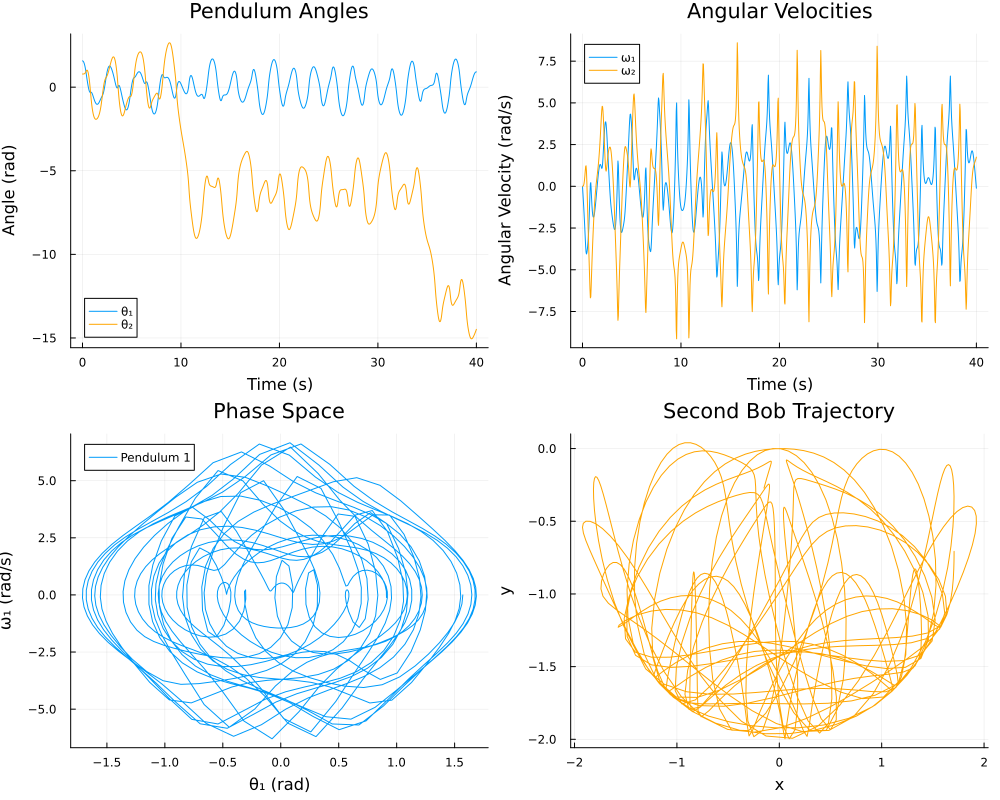

In [100]:
# Plot 1: Angles vs Time
p1 = plot(sol.t, θ₁_vals, label="θ₁", xlabel="Time (s)", ylabel="Angle (rad)", title="Pendulum Angles")
plot!(p1, sol.t, θ₂_vals, label="θ₂", color=:orange)

# Plot 2: Angular Velocities vs Time
p2 = plot(sol.t, ω₁_vals, label="ω₁", xlabel="Time (s)", ylabel="Angular Velocity (rad/s)", title="Angular Velocities")
plot!(p2, sol.t, ω₂_vals, label="ω₂", color=:orange)

# Plot 3: Phase space (θ₁ vs ω₁)
p3 = plot(θ₁_vals, ω₁_vals, label="Pendulum 1", xlabel="θ₁ (rad)", ylabel="ω₁ (rad/s)", title="Phase Space")

# Plot 4: Trace of second bob
p4 = plot(x₂, y₂, label="Bob 2 trajectory", xlabel="x", ylabel="y", title="Second Bob Trajectory", color=:orange, legend=false)

# Combine all plots
combined_plot = plot(p1, p2, p3, p4, layout=(2,2), size=(1000, 800))
savefig(combined_plot, "./media/double_pendulum_plots.png")

combined_plot

### Step 10: Animate the Double Pendulum

Create and save a GIF of the simulated motion.

In [102]:
# Create an animation of the double pendulum
# Subsample frames for speed
frames = 1:length(sol.t)

anim = @animate for i in frames
    x1c = l₁_val * sin(θ₁_vals[i])*2
    y1c = -l₁_val * cos(θ₁_vals[i])*2
    x2c = x1c + l₂_val * sin(θ₂_vals[i])*2
    y2c = y1c - l₂_val * cos(θ₂_vals[i])*2

    plot([0, x1c, x2c], [0, y1c, y2c], bg=:black;
        marker=:circle, markersize=[0, 0, 0],
        linewidth=2, color=:white,
        xlim=(-7, 7), ylim=(-6, 2),
        legend=false,
        xaxis=false, yaxis=false,
        xlabel="", ylabel="",
        grid=false,
        size=(1400,800)
        )

    scatter!([x1c], [y1c], marker=:circle, markersize=10, color=:red, label="", markerstrokewidth=0)
    scatter!([x2c], [y2c], marker=:circle, markersize=10, color=:skyblue, label="", markerstrokewidth=0)


    plot!(x₂[1:i] .* 2, y₂[1:i] .* 2; color=:skyblue, linewidth=1)
end

mp4(anim, "./media/double_pendulum.mp4", fps=sum(sol.t .< 1))

# Display as HTML video player
html_content = """
<video width="1400" height="800" controls>
    <source src="./media/double_pendulum.mp4" type="video/mp4">
    Your browser does not support the video tag.
</video>
"""
display(MIME("text/html"), html_content)

[ Info: Saved animation to e:\programming\academic\julia\media\double_pendulum.mp4


Your browser does not support the video tag.